In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Dataset 1 ----
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100 * x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps

# ---- Dataset 2 ----
np.random.seed(45)
x2 = np.random.uniform(-1, 1, num_samples)
f_x2 = 3 * x2 + 4
eps2 = np.random.randn(num_samples)
y2 = f_x2 + eps2


In [3]:
# ---- Gradient Descent with Momentum ----

def gradient_descent_with_momentum(x, y, theta0_values, theta1_values, lr=0.01, beta=0.9, epochs=15):
    theta0, theta1 = 0.0, 0.0  # initial values of theta parameters
    v0, v1 = 0.0, 0.0          # initial values of velocity parameters
    n = len(x)
    mse_losses_list = []

    for epoch in range(epochs):
        y_pred = theta0 + theta1 * x
        error = y_pred - y

        # Gradients
        grad0 = (2/n) * np.sum(error)
        grad1 = (2/n) * np.sum(error * x)

        # Update velocities
        v0 = beta * v0 + (1 - beta) * grad0
        v1 = beta * v1 + (1 - beta) * grad1

        # Parameter update
        theta0 -= lr * v0
        theta0_values.append(theta0)
        theta1 -= lr * v1
        theta1_values.append(theta1)

        # Compute loss (MSE)
        mse_loss = np.mean(error**2)
        mse_losses_list.append(mse_loss)

    return theta0, theta1, mse_losses_list

In [4]:
# Run for both datasets
theta0_1_values = [0.0]
theta1_1_values = [0.0]
t0_1, t1_1, mse_losses_1 = gradient_descent_with_momentum(x1, y, theta0_1_values, theta1_1_values, lr=0.00005, beta=0.9, epochs=15)

theta0_2_values = [0.0]
theta1_2_values = [0.0]
t0_2, t1_2, mse_losses_2 = gradient_descent_with_momentum(x2, y2, theta0_2_values, theta1_2_values, lr=0.01, beta=0.9, epochs=15)

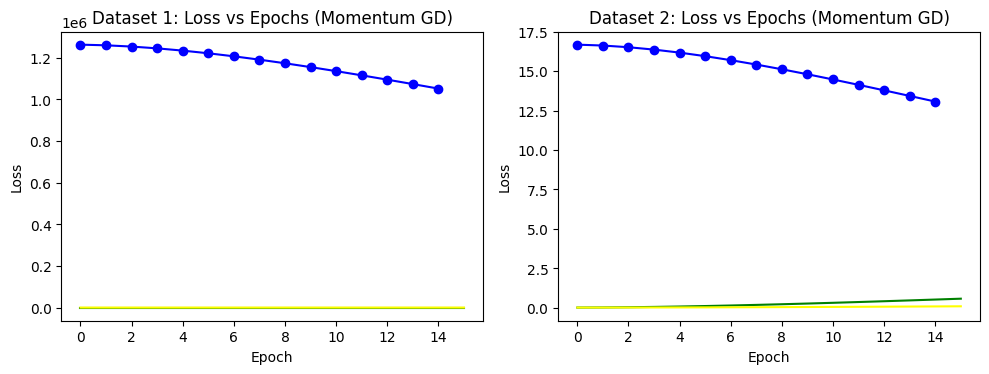

In [5]:
# ---- Plotting ----
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(mse_losses_1, marker='o', color='blue')
plt.plot(theta0_1_values, label='theta0', color = 'green')
plt.plot(theta1_1_values, label='theta1', color = 'yellow')
plt.title("Dataset 1: Loss vs Epochs (Momentum GD)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(mse_losses_2, marker='o', color='blue')
plt.plot(theta0_2_values, label='theta0', color = 'green')
plt.plot(theta1_2_values, label='theta1', color = 'yellow')
plt.title("Dataset 2: Loss vs Epochs (Momentum GD)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()